In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_avalanche",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.8,
                      "num_val_benchmarks" : 2,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "EWC",
                   "grow_from" : "output",
                   "hessian_percentile" : 98,
                   "grad_percentile" : 98,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 200,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 5,
                #"lr" : (5e-5, 2e-3),
                "num_epochs" : (3, 5),
                "ewc_lambda" : (100,400)
                #"lwf_alpha" : None, #(0.1, 0.9),
                #"lwf_temperature" : None} #(1, 3)
                }

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [5]:
device = get_device(2)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-22 16:30:10,398] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:30:10 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:05<00:00, 68.31it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3368
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8990
100%|██████████| 376/376 [00:05<00:00, 69.56it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1544
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9544
100%|██████████| 376/376 [00:05<00:00, 71.28it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1022
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9685
100%|██████████| 376/376 [00:05<00:00, 69.67it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0850
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9738
-- >> End of training phase << --


[I 2024-07-22 16:30:36,574] Trial 0 finished with value: 9.545744680851062 and parameters: {'num_epochs': 4, 'ewc_lambda': 252}. Best is trial 0 with value: 9.545744680851062.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:30:36 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:05<00:00, 72.13it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3313
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9012
100%|██████████| 376/376 [00:05<00:00, 71.86it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1265
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9605
100%|██████████| 376/376 [00:05<00:00, 69.05it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0979
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9703
100%|██████████| 376/376 [00:05<00:00, 70.79it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0856
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9731
-- >> End of training phase << --


[I 2024-07-22 16:31:02,212] Trial 1 finished with value: 9.531489361702127 and parameters: {'num_epochs': 4, 'ewc_lambda': 369}. Best is trial 0 with value: 9.545744680851062.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:31:02 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:05<00:00, 69.24it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3246
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9045
100%|██████████| 376/376 [00:05<00:00, 70.79it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1282
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9606
100%|██████████| 376/376 [00:05<00:00, 70.71it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1003
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9684
100%|██████████| 376/376 [00:05<00:00, 69.01it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0997
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9689
100%|██████████| 376/376 [00:06<00:00, 61.10it/s]
Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0755
	Top1_Acc_Epoch/train_phase/train_stream/Task000 

[I 2024-07-22 16:31:36,590] Trial 2 finished with value: 9.542553191489361 and parameters: {'num_epochs': 5, 'ewc_lambda': 315}. Best is trial 0 with value: 9.545744680851062.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:31:36 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:09<00:00, 38.96it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3281
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9010
100%|██████████| 376/376 [00:09<00:00, 39.33it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1249
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9610
100%|██████████| 376/376 [00:09<00:00, 41.64it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1006
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9684
100%|██████████| 376/376 [00:09<00:00, 41.32it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0841
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9733
100%|██████████| 376/376 [00:09<00:00, 40.96it/s]
Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0729
	Top1_Acc_Epoch/train_phase/train_stream/Task000 

[I 2024-07-22 16:32:29,853] Trial 3 finished with value: 9.548404255319147 and parameters: {'num_epochs': 5, 'ewc_lambda': 167}. Best is trial 3 with value: 9.548404255319147.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:32:29 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:09<00:00, 38.91it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3234
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9019
100%|██████████| 376/376 [00:09<00:00, 39.87it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1285
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9612
100%|██████████| 376/376 [00:08<00:00, 44.84it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0997
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9685
-- >> End of training phase << --


[I 2024-07-22 16:33:02,862] Trial 4 finished with value: 9.537127659574468 and parameters: {'num_epochs': 3, 'ewc_lambda': 237}. Best is trial 3 with value: 9.548404255319147.


###########################
{'ewc': <avalanche.training.supervised.strategy_wrappers.EWC object at 0x7871977a8c20>}
-- >> Start of training phase << --
100%|██████████| 376/376 [00:08<00:00, 42.70it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3310
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8991
100%|██████████| 376/376 [00:08<00:00, 42.53it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1283
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9606
100%|██████████| 376/376 [00:08<00:00, 42.93it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1004
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9682
100%|██████████| 376/376 [00:08<00:00, 43.30it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0939
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9702
100%|██████████| 376/376 [00:08<00:00, 44.01it/s]
Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0777
	Top1_Acc_Epoch/train

[I 2024-07-22 16:33:52,097] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:33:52 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:09<00:00, 39.40it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5048
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8841
100%|██████████| 376/376 [00:09<00:00, 40.23it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2199
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9530
100%|██████████| 376/376 [00:09<00:00, 40.57it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1862
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9619
100%|██████████| 376/376 [00:08<00:00, 43.03it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1699
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9662
-- >> End of training phase << --


[I 2024-07-22 16:34:34,761] Trial 0 finished with value: 9.66308510638298 and parameters: {'num_epochs': 4, 'ewc_lambda': 252}. Best is trial 0 with value: 9.66308510638298.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:34:34 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:08<00:00, 42.01it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5358
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8828
100%|██████████| 376/376 [00:08<00:00, 43.80it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2444
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9486
100%|██████████| 376/376 [00:08<00:00, 45.08it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2052
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9595
100%|██████████| 376/376 [00:08<00:00, 43.22it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1857
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9648
-- >> End of training phase << --


[I 2024-07-22 16:35:14,958] Trial 1 finished with value: 9.671861702127657 and parameters: {'num_epochs': 4, 'ewc_lambda': 369}. Best is trial 1 with value: 9.671861702127657.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:35:14 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:09<00:00, 38.09it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5117
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8838
100%|██████████| 376/376 [00:09<00:00, 40.98it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2299
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9512
100%|██████████| 376/376 [00:08<00:00, 42.19it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1938
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9606
100%|██████████| 376/376 [00:08<00:00, 42.97it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1805
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9639
100%|██████████| 376/376 [00:08<00:00, 43.46it/s]
Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1877
	Top1_Acc_Epoch/train_phase/train_stream/Task000 

[I 2024-07-22 16:36:05,816] Trial 2 finished with value: 9.658670212765955 and parameters: {'num_epochs': 5, 'ewc_lambda': 315}. Best is trial 1 with value: 9.671861702127657.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:36:05 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:08<00:00, 41.98it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5130
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8784
100%|██████████| 376/376 [00:09<00:00, 41.17it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2189
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9517
100%|██████████| 376/376 [00:08<00:00, 42.01it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1854
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9607
100%|██████████| 376/376 [00:08<00:00, 41.97it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2111
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9580
100%|██████████| 376/376 [00:09<00:00, 40.48it/s]
Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1643
	Top1_Acc_Epoch/train_phase/train_stream/Task000 

[I 2024-07-22 16:36:56,050] Trial 3 finished with value: 9.668989361702131 and parameters: {'num_epochs': 5, 'ewc_lambda': 167}. Best is trial 1 with value: 9.671861702127657.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:36:56 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:05<00:00, 67.30it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5161
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8819
100%|██████████| 376/376 [00:05<00:00, 68.90it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2351
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9501
100%|██████████| 376/376 [00:05<00:00, 69.75it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2023
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9581
-- >> End of training phase << --


[I 2024-07-22 16:37:17,332] Trial 4 finished with value: 9.66622340425532 and parameters: {'num_epochs': 3, 'ewc_lambda': 237}. Best is trial 1 with value: 9.671861702127657.


###########################
{'ewc': <avalanche.training.supervised.strategy_wrappers.EWC object at 0x7871977a8c20>}
-- >> Start of training phase << --
100%|██████████| 376/376 [00:05<00:00, 69.78it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4943
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8845
100%|██████████| 376/376 [00:05<00:00, 69.58it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2696
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9430
100%|██████████| 376/376 [00:05<00:00, 69.62it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2021
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9599
100%|██████████| 376/376 [00:05<00:00, 69.70it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1830
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9651
-- >> End of training phase << --


[I 2024-07-22 16:37:43,995] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:37:44 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:05<00:00, 66.00it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5290
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8998
100%|██████████| 376/376 [00:05<00:00, 66.00it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3336
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9448
100%|██████████| 376/376 [00:05<00:00, 65.93it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2989
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9548
100%|██████████| 376/376 [00:05<00:00, 66.03it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2845
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9582
-- >> End of training phase << --


[I 2024-07-22 16:38:12,225] Trial 0 finished with value: 9.728368794326238 and parameters: {'num_epochs': 4, 'ewc_lambda': 252}. Best is trial 0 with value: 9.728368794326238.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:38:12 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:05<00:00, 65.56it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5833
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8965
100%|██████████| 376/376 [00:05<00:00, 65.58it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3737
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9436
100%|██████████| 376/376 [00:05<00:00, 65.55it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3419
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9505
100%|██████████| 376/376 [00:05<00:00, 65.26it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3208
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9555
-- >> End of training phase << --


[I 2024-07-22 16:38:40,544] Trial 1 finished with value: 9.719822695035461 and parameters: {'num_epochs': 4, 'ewc_lambda': 369}. Best is trial 0 with value: 9.728368794326238.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:38:40 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:05<00:00, 63.68it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5669
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8959
100%|██████████| 376/376 [00:06<00:00, 60.36it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3587
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9440
100%|██████████| 376/376 [00:06<00:00, 62.13it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3813
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9445
100%|██████████| 376/376 [00:06<00:00, 62.03it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3190
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9554
100%|██████████| 376/376 [00:06<00:00, 60.98it/s]
Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2974
	Top1_Acc_Epoch/train_phase/train_stream/Task000 

[I 2024-07-22 16:39:17,057] Trial 2 finished with value: 9.729751773049642 and parameters: {'num_epochs': 5, 'ewc_lambda': 315}. Best is trial 2 with value: 9.729751773049642.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:39:17 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:06<00:00, 61.75it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5001
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8968
100%|██████████| 376/376 [00:06<00:00, 60.60it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2939
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9485
100%|██████████| 376/376 [00:06<00:00, 60.69it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2679
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9546
100%|██████████| 376/376 [00:06<00:00, 61.17it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2485
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9606
100%|██████████| 376/376 [00:06<00:00, 60.87it/s]
Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2406
	Top1_Acc_Epoch/train_phase/train_stream/Task000 

[I 2024-07-22 16:39:53,377] Trial 3 finished with value: 9.723758865248229 and parameters: {'num_epochs': 5, 'ewc_lambda': 167}. Best is trial 2 with value: 9.729751773049642.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-22 16:39:53 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:06<00:00, 61.20it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5303
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8961
100%|██████████| 376/376 [00:06<00:00, 62.07it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3442
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9449
100%|██████████| 376/376 [00:06<00:00, 62.52it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3483
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9465
-- >> End of training phase << --


[I 2024-07-22 16:40:17,200] Trial 4 finished with value: 9.727624113475175 and parameters: {'num_epochs': 3, 'ewc_lambda': 237}. Best is trial 2 with value: 9.729751773049642.


###########################
{'ewc': <avalanche.training.supervised.strategy_wrappers.EWC object at 0x7871977a8c20>}
-- >> Start of training phase << --
100%|██████████| 376/376 [00:06<00:00, 61.29it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5028
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9023
100%|██████████| 376/376 [00:06<00:00, 62.49it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3249
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9482
100%|██████████| 376/376 [00:05<00:00, 63.22it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2971
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9556
100%|██████████| 376/376 [00:06<00:00, 61.37it/s]
Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2848
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9580
100%|██████████| 376/376 [00:05<00:00, 62.81it/s]
Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2700
	Top1_Acc_Epoch/train

## Visualize results

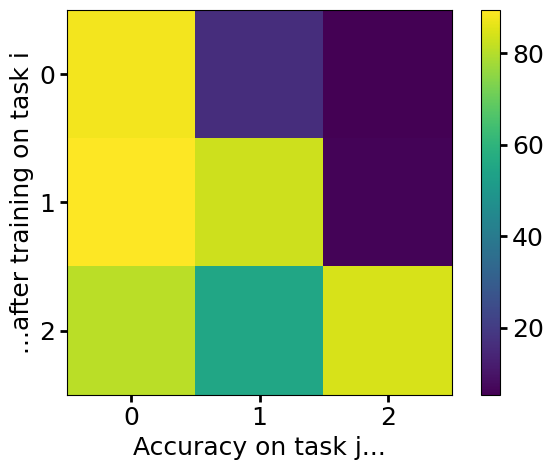

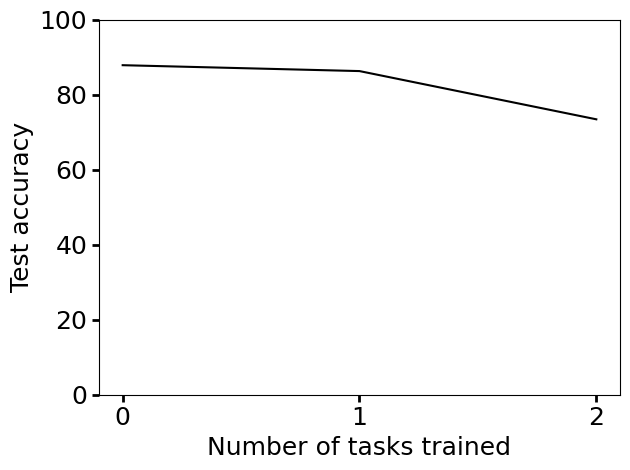

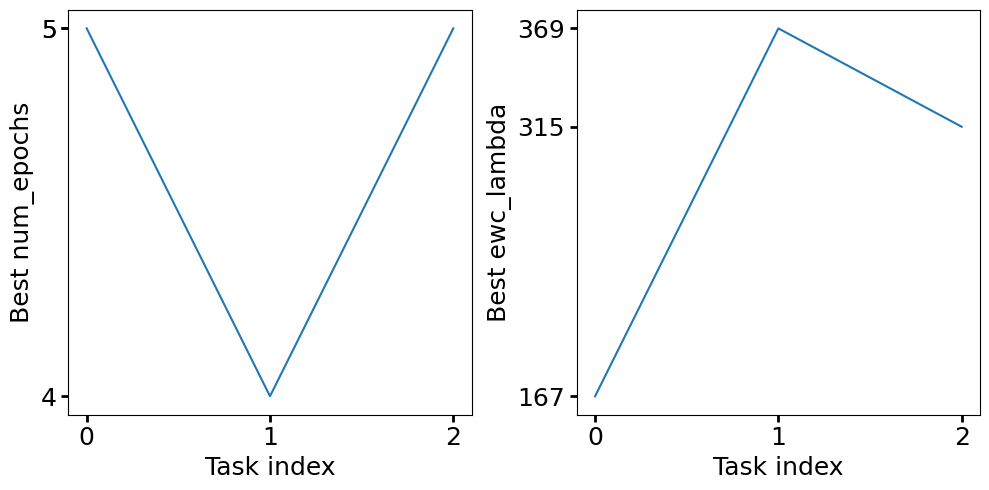

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


KeyError: 'ewc'

## Visualize validation

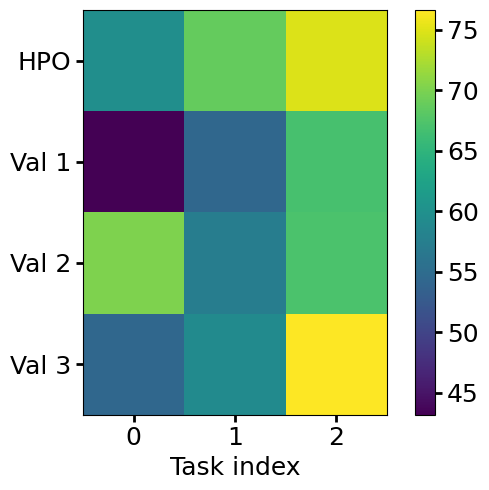

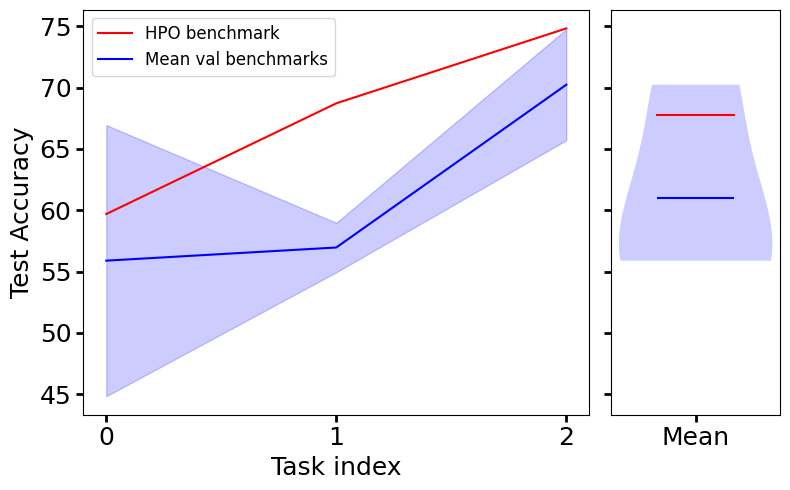

In [ ]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [ ]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)